Questions for Divvy Data:

Points:
(1) Covid allegedly affected the number of bicyclists, because public transit was restricted and/or seen as dangerous. Many people tried to buy bicycles, but because of supply chain issues, many dealers couldn't get enough stock to satisify demand, so people may have turned to DIVVY as a stopgap measure.

(2) Covid also drastically reducted tourism throughout the summer of 2020, especially in Chicago, which had strong public health directives requiring masking.

Questions:
A) From 2019 to 2020, did Divvy use drop (because of business shut-downs) or increase (because people wanted to bike rather than public transit)? 

A1) Did the path of bike usage shift? (How to measure this? Aggregrate where bikes went from given stations?)

B) Did the proportion of "casual" (=non-member) users drop (#2) in 2020? Did it pick up in 2021?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def getData(year,months=['01','02','03','04','05','06','07','08','09','10','11','12']):
    # procedure accepts year (as string) and optional list of months (strings) for which to retreive data
    # will return a df with the DIVVY data for that year and month(s)
    import pandas as pd

    if not isinstance(year,str):
        year = str(year)

    if not isinstance(months,list):
        months = [months]

    if int(year) >= 2020:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/'
    else:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/pre2020/'

    fileName = year + months[0] + '-divvy-tripdata.json'
    print(fileName)
    retData = pd.read_json(workDir+fileName,orient='index')

    if len(months) > 0:
        for month in months[1:]:
                fileName = year + month + '-divvy-tripdata.json'
                print(fileName)
                newData = pd.read_json(workDir+fileName,orient='index')
                retData = pd.concat([retData,newData])

    return retData

In [3]:
data19 = getData('2019')
data19.shape

201901-divvy-tripdata.json
201902-divvy-tripdata.json
201903-divvy-tripdata.json
201904-divvy-tripdata.json
201905-divvy-tripdata.json
201906-divvy-tripdata.json
201907-divvy-tripdata.json
201908-divvy-tripdata.json
201909-divvy-tripdata.json
201910-divvy-tripdata.json
201911-divvy-tripdata.json
201912-divvy-tripdata.json


(3818004, 16)

In 2020, Divvy changed the sort of information it collected. For this analysis, let's drop the columns we don't care about and combine the two DFs.

Eliminate: 2019: ride_id, bikeid, from_station_id, from_station_name, to_station_id, to_station_name, gender, birthyear
    2020: ride_id, ridable_type, start_station_name, start_station_id, end_station_name, end_station_id

Rename: 2020: started_at -> start_time, ended_at -> end_time

Finally, for some rows, the end time is before the start time. This results in negative "tripduration" values. These errors seem to be when bikes are removed or added to the system (the station ID fields are often blank or the start and end locations are identical). In any case, they represent a very small proportion of the total number of rows, so we will just drop them.

In [5]:
data19.drop(columns = ['trip_id', 'bikeid', 'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'gender', 'birthyear','tripduration'],inplace=True)
data19['tripduration'] = data19['end_time'] - data19['start_time']

prob = data19[data19['tripduration'] < '0:00:00']
prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 384478 to 384497
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   start_time    13 non-null     datetime64[ns] 
 1   end_time      13 non-null     datetime64[ns] 
 2   usertype      13 non-null     object         
 3   start_lat     13 non-null     float64        
 4   start_lng     13 non-null     float64        
 5   end_lat       13 non-null     float64        
 6   end_lng       13 non-null     float64        
 7   tripduration  13 non-null     timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(1), timedelta64[ns](1)
memory usage: 936.0+ bytes


In [8]:
b = len(data19)
print('before:',len(data19))
data19.drop(data19[data19['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(data19))
print('dropped: ',b-len(data19),(b-len(data19))/b*100)

before: 3817965
after:  3817965
dropped:  0 0.0


In [9]:
data20 = getData('2020')
data20.shape

202001-divvy-tripdata.json
202002-divvy-tripdata.json
202003-divvy-tripdata.json
202004-divvy-tripdata.json
202005-divvy-tripdata.json
202006-divvy-tripdata.json
202007-divvy-tripdata.json
202008-divvy-tripdata.json
202009-divvy-tripdata.json
202010-divvy-tripdata.json
202011-divvy-tripdata.json
202012-divvy-tripdata.json


(3541683, 13)

In [10]:
data20.drop(columns=['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id'],inplace=True)
data20.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
data20['tripduration'] = data20['end_time'] - data20['start_time']
prob = data20[data20['tripduration'] < '0:00:00']
prob.describe()

,start_lat,start_lng,end_lat,end_lng,tripduration
count,10665.000000,10665.000000,10639.000000,10639.000000,10665
mean,41.905145,-87.640899,41.905472,-87.642753,-1 days +07:05:44.387998125
std,0.038737,0.021870,0.039757,0.022618,3 days 16:05:51.065799012
min,41.691300,-87.774446,41.700000,-87.774446,-21 days +19:50:02
25%,41.884241,-87.652310,41.883668,-87.654020,-1 days +23:59:35
50%,41.900363,-87.636829,41.899930,-87.638973,-1 days +23:59:47
75%,41.929499,-87.626761,41.930585,-87.627691,-1 days +23:59:54
max,42.064313,-87.552812,42.064854,-87.549386,-1 days +23:59:59


In [11]:
b = len(data20)

print('before:',b)
data20.drop(data20[data20['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(data20))
print('dropped = ',b-len(data20),(b-len(data20))/b*100)

before: 3541683
after:  3472163
dropped =  69520 1.9629085945862461


Using the same boolean mask, the prob df has 10665 records but when I drop the problem records, it gets rid of 69520 rows, not the expected 10665.

WTF?

Still, only 2% of the total, so it probaby won't affect the interpretation much. But 2020 has a lot more "problem" rows than 19 or 21.

Could this be because of the ebikes? (Need to chart WHEN the problem rows appear and the TYPE of bike used -- question for further reserach.)

In [13]:
data21 = getData('2021')
data21.shape

202101-divvy-tripdata.json
202102-divvy-tripdata.json
202103-divvy-tripdata.json
202104-divvy-tripdata.json
202105-divvy-tripdata.json
202106-divvy-tripdata.json
202107-divvy-tripdata.json
202108-divvy-tripdata.json
202109-divvy-tripdata.json
202110-divvy-tripdata.json
202111-divvy-tripdata.json
202112-divvy-tripdata.json


(5595063, 13)

In [14]:
data21.drop(columns=['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id'],inplace=True)
data21.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
data21['tripduration'] = data21['end_time'] - data21['start_time']
prob = data21[data21['tripduration'] < '0:00:00']
prob.describe()



,start_lat,start_lng,end_lat,end_lng,tripduration
count,147.000000,147.000000,146.000000,146.000000,147
mean,41.908401,-87.647183,41.907911,-87.649534,-1 days +23:44:29.564625851
std,0.041060,0.021769,0.042781,0.025698,0 days 00:20:31.832180729
min,41.684961,-87.720000,41.670000,-87.770000,-1 days +23:01:58
25%,41.891023,-87.654460,41.894498,-87.658404,-1 days +23:23:32.500000
50%,41.912616,-87.648830,41.919909,-87.648830,-1 days +23:58:50
75%,41.921094,-87.633772,41.925592,-87.633693,-1 days +23:59:52
max,42.040000,-87.594747,42.039713,-87.570000,-1 days +23:59:59


In [16]:
b = len(data21)

print('before:',b)
data21.drop(data21[data21['tripduration'] < '0:00:00'].index, inplace=True)
print('after: ',len(data21))
print('dropped = ',b-len(data21),(b-len(data21))/b*100)


before: 5595063
after:  5593819
dropped =  1244 0.022233887268114764


In [17]:
print('change from 19 to 20 ',(len(data20) - len(data19))/len(data19) )
print('change from 20 to 21 ',(len(data21) - len(data20))/len(data20) )

change from 19 to 20  -0.09057233369085363
change from 20 to 21  0.611047350023602


In [18]:
bigData = pd.concat([data19,data20,data21],axis=0)
bigData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12883947 entries, 0 to 247539
Data columns (total 8 columns):
 #   Column        Dtype          
---  ------        -----          
 0   start_time    datetime64[ns] 
 1   end_time      datetime64[ns] 
 2   usertype      object         
 3   start_lat     float64        
 4   start_lng     float64        
 5   end_lat       float64        
 6   end_lng       float64        
 7   tripduration  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(1), timedelta64[ns](1)
memory usage: 884.7+ MB


In [19]:
bigData['month'] = pd.DatetimeIndex(bigData['start_time']).month
bigData['year'] = pd.DatetimeIndex(bigData['start_time']).year
# I added these to facilitate doing a pivot table based on year and month

In [20]:
pivot1920 = bigData.pivot_table(index='month',columns='year',values='start_lat',aggfunc = 'count')
pivot1920

year,2019,2020,2021
month,,,
1,103214,140778,96802
2,96146,136326,49603
3,165390,141147,228434
4,264690,83250,337139
5,366456,195874,531502
6,473985,335568,729448
7,555213,541377,822263
8,588101,611788,804205
9,491935,522988,756000


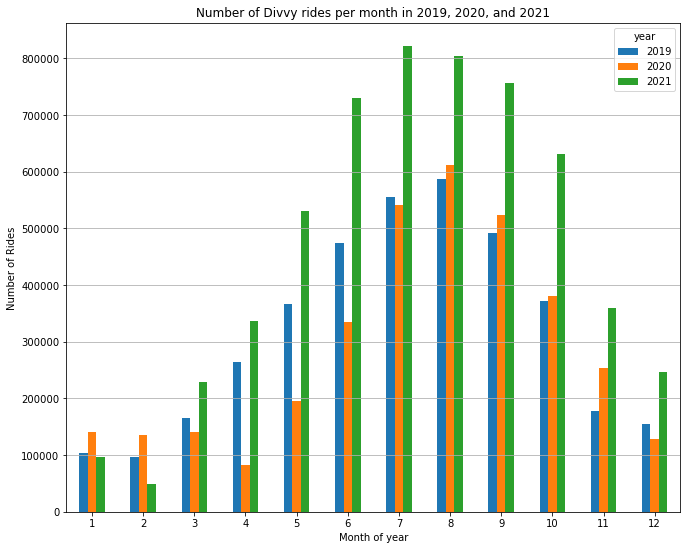

In [22]:
pivot1920.plot(kind = 'bar',figsize=(11,9))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.ylabel('Number of Rides')
plt.xlabel('Month of year')
plt.title('Number of Divvy rides per month in 2019, 2020, and 2021')
plt.grid(axis='y')

In [23]:
bigData['usertype'].replace(['Subscriber','Customer'],['member','casual'],inplace = True)

In [24]:
pivotCust = bigData.pivot_table(index=['month'],columns=['year','usertype'],values='start_time',aggfunc = 'count')
pivotCust

year        2019            2020            2021        
usertype  casual  member  casual  member  casual  member
month                                                   
1           4602   98670    7626  133152   18113   78689
2           2638   93548   12593  123733   10129   39474
3          15923  149688   27294  113853   84010  144424
4          47744  217566   23207   60043  136559  200580
5          81620  285825   85009  110865  256852  274650
6         130218  345177  151356  184212  370605  358843
7         175630  381672  264670  276707  441980  380283
8         186889  403295  284958  326830  412595  391610
9         129173  364046  226793  296195  363834  392166
10         71035  300751  142191  238281  257184  373901
11         18723  158440   86345  167441  106881  252983
12         16430  138662   29505   99304   69716  177758

In [25]:
pivotCustAnnual = bigData.pivot_table(index=['year'],columns = ['usertype'],values='start_time',aggfunc='count')
pivotCustAnnual

usertype,casual,member
year,,
2019,880625,2937340
2020,1341547,2130616
2021,2528458,3065361


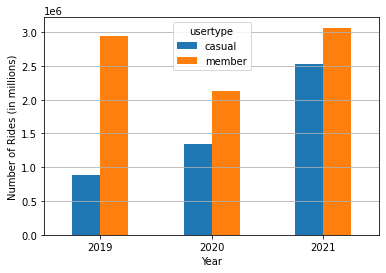

In [26]:
pivotCustAnnual.plot(kind ='bar')
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.ylabel('Number of Rides (in millions)')
plt.xlabel('Year')
plt.grid(axis='y')

Let's dig into the different types of riders and see when they show up

Text(0.5, 1.0, "Number of 'casual' Divvy rides per month")

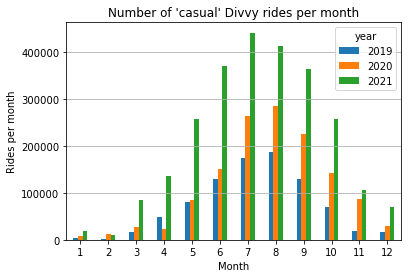

In [27]:
pivotCasual = bigData[bigData['usertype']== 'casual'].pivot_table(index=['month'],columns=['year'],values='start_time',aggfunc = 'count')
import numpy as np
pivotCasual.plot(kind='bar',figsize=(6,4))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Month')
plt.ylabel('Rides per month')
plt.yticks(np.arange(0,450000,100000))
plt.grid(axis='y')
plt.title("Number of 'casual' Divvy rides per month")

In [283]:
pivotCasual

year,2019,2020,2021
month,,,
1,4602,7626,18113
2,2638,12593,10129
3,15923,27294,84010
4,47744,23207,136559
5,81620,85009,256852
6,130218,151356,370605
7,175630,264670,441980
8,186889,284958,412595
9,129173,226793,363834


Text(0.5, 1.0, "Number of 'member' Divvy rides per month")

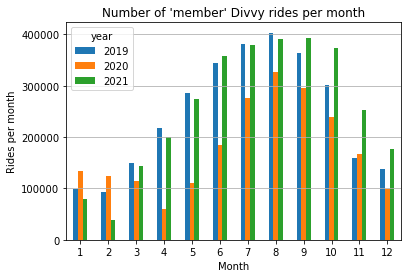

In [28]:
bigData[bigData['usertype']== 'member'].pivot_table(index=['month'],columns=['year'],values='start_time',aggfunc = 'count').plot(kind='bar',figsize=(6,4))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Month')
plt.ylabel('Rides per month')
plt.yticks(np.arange(0,450000,100000))
plt.grid(axis='y')
plt.title("Number of 'member' Divvy rides per month")

different usage pattern over the calendar month.
How does the length of ride vary?

In [279]:
rideLengthPivot = bigData.pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = 'mean')
rideLengthPivot

year                          2019                            \
usertype                    casual                    member   
month                                                          
1        0 days 00:47:19.483485441 0 days 00:15:39.002584372   
2        0 days 02:25:36.291129643 0 days 00:13:24.217332278   
3        0 days 00:52:18.354079005 0 days 00:13:02.420942226   
4        0 days 00:50:56.547147285 0 days 00:13:30.767528014   
5        0 days 00:51:14.379282038 0 days 00:13:51.001619872   
6        0 days 00:45:55.202391374 0 days 00:14:32.846478763   
7        0 days 00:59:47.058742811 0 days 00:16:25.998891718   
8        0 days 01:07:00.451342775 0 days 00:16:11.132429115   
9        0 days 00:51:40.002183118 0 days 00:14:07.838915961   
10       0 days 00:58:59.529020905 0 days 00:13:01.853250695   
11       0 days 01:07:01.965817443 0 days 00:12:25.924255238   
12       0 days 01:03:19.959403530 0 days 00:11:24.909838311   

year                          2020                            \
usertype                    casual                    member   
month                                                          
1        0 days 02:44:14.224495148 0 days 00:11:07.096063145   
2        0 days 02:07:52.678551576 0 days 00:12:50.609336232   
3        0 days 01:03:19.231369531 0 days 00:14:21.617471652   
4        0 days 01:13:34.635799543 0 days 00:21:33.099462052   
5        0 days 00:51:04.373642790 0 days 00:19:46.572813782   
6        0 days 00:51:49.666778984 0 days 00:18:43.822416563   
7        0 days 00:59:44.317448142 0 days 00:17:46.309840372   
8        0 days 00:44:59.836589953 0 days 00:16:50.276789156   
9        0 days 00:38:11.977702133 0 days 00:15:33.097594490   
10       0 days 00:30:15.354670830 0 days 00:14:02.341403636   
11       0 days 00:31:50.813087034 0 days 00:13:35.213734987   
12       0 days 00:26:55.189357735 0 days 00:12:44.148956738   

year                          2021                            
usertype                    casual                    member  
month                                                         
1        0 days 00:25:41.257605035 0 days 00:12:52.351548501  
2        0 days 00:49:22.716556422 0 days 00:18:01.486421441  
3        0 days 00:38:09.611343887 0 days 00:13:58.293254583  
4        0 days 00:38:01.419144838 0 days 00:14:41.359043773  
5        0 days 00:38:13.854795757 0 days 00:14:38.285042781  
6        0 days 00:37:07.396915853 0 days 00:14:40.668334062  
7        0 days 00:32:47.517742884 0 days 00:14:14.360705053  
8        0 days 00:28:47.273275245 0 days 00:14:06.110571742  
9        0 days 00:27:49.010798880 0 days 00:13:44.135761386  
10       0 days 00:28:40.507694879 0 days 00:12:30.120630862  
11       0 days 00:23:08.050588972 0 days 00:11:18.571239964  
12       0 days 00:23:29.724338745 0 days 00:11:00.294208980

In [280]:
rideLengthPivot.describe()

year                           2019                             \
usertype                     casual                     member   
count                            12                         12   
mean      0 days 01:03:25.768668780  0 days 00:13:58.159505546   
std       0 days 00:26:52.418887968  0 days 00:01:31.068454133   
min       0 days 00:45:55.202391374  0 days 00:11:24.909838311   
25%       0 days 00:51:09.921248349  0 days 00:13:02.279019343   
50%       0 days 00:55:38.941549955  0 days 00:13:40.884573943   
75%       0 days 01:04:15.082388341  0 days 00:14:49.385505165   
max       0 days 02:25:36.291129643  0 days 00:16:25.998891718   

year                           2020                             \
usertype                     casual                     member   
count                            12                         12   
mean      0 days 01:03:39.358291116  0 days 00:15:44.517156900   
std       0 days 00:41:41.899494578  0 days 00:03:11.954026761   
min       0 days 00:26:55.189357735  0 days 00:11:07.096063145   
25%       0 days 00:36:36.686548358  0 days 00:13:24.062635298   
50%       0 days 00:51:27.020210887  0 days 00:14:57.357533071   
75%       0 days 01:05:53.082477034  0 days 00:18:00.687984419   
max       0 days 02:44:14.224495148  0 days 00:21:33.099462052   

year                           2021                             
usertype                     casual                     member  
count                            12                         12  
mean      0 days 00:32:36.528400116  0 days 00:13:48.836396927  
std       0 days 00:07:47.268081331  0 days 00:01:50.023383299  
min       0 days 00:23:08.050588972  0 days 00:11:00.294208980  
25%       0 days 00:27:17.072500418  0 days 00:12:46.793819091  
50%       0 days 00:30:47.395509064  0 days 00:14:02.201913162  
75%       0 days 00:38:03.467194600  0 days 00:14:38.880865601  
max       0 days 00:49:22.716556422  0 days 00:18:01.486421441

In [168]:
import pandas as pd
casual_length = bigData[bigData['usertype']== 'casual'].pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = 'mean')
member_length = bigData[bigData['usertype']== 'member'].pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = 'mean')

In [70]:
cols = temp.columns
for c in cols:
    temp[c] = temp[c].dt.round(freq='S')
temp

year,2019,2020,2021
usertype,casual,casual,casual
month,,,
1,0 days 00:47:19,0 days 02:44:14,0 days 00:25:41
2,0 days 02:25:36,0 days 02:07:53,0 days 00:49:23
3,0 days 00:52:18,0 days 01:03:19,0 days 00:38:10
4,0 days 00:50:57,0 days 01:13:35,0 days 00:38:01
5,0 days 00:51:14,0 days 00:51:04,0 days 00:38:14
6,0 days 00:45:55,0 days 00:51:50,0 days 00:37:07
7,0 days 00:59:47,0 days 00:59:44,0 days 00:32:48
8,0 days 01:07:00,0 days 00:45:00,0 days 00:28:47


In [81]:
for c in cols:
    temp[c] = temp[c].astype('timedelta64[m]')
temp

year,2019,2020,2021
usertype,casual,casual,casual
month,,,
1,47.0,164.0,25.0
2,145.0,127.0,49.0
3,52.0,63.0,38.0
4,50.0,73.0,38.0
5,51.0,51.0,38.0
6,45.0,51.0,37.0
7,59.0,59.0,32.0
8,67.0,44.0,28.0


In [169]:
def plotRideLength(df):
    cols = df.columns
    for c in cols:
        df[c] = df[c].astype('timedelta64[m]')
    # round the timedelta data to minues

    df.plot(kind='bar',figsize=(6,4))
    plt.xticks(rotation=0,horizontalalignment = 'center')
    plt.xlabel('Month')
    plt.ylabel('Length of Ride (in minutes)')
    #plt.yticks(np.arange(0,450000,100000))
    plt.grid(axis='y')
    plt.title("Length of ride")

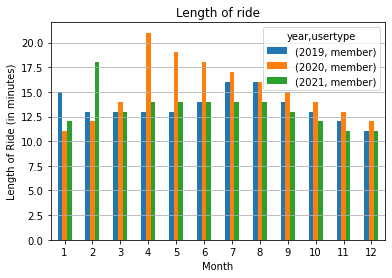

In [170]:
plotRideLength(member_length)

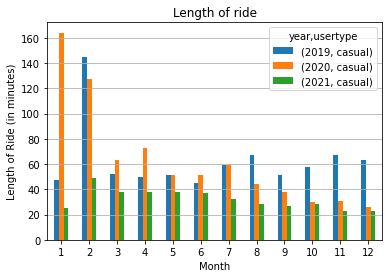

In [171]:
plotRideLength(casual_length)

In [90]:
bigData.columns

Index(['start_time', 'end_time', 'usertype', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'tripduration', 'month', 'year'],
      dtype='object')

In [100]:
prob = bigData.loc[ (bigData['usertype']== 'casual') & (bigData['month'] == 1) & (bigData['year'] == 2020)]

In [109]:
prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7626 entries, 99279 to 86287
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   start_time    7626 non-null   datetime64[ns] 
 1   end_time      7626 non-null   datetime64[ns] 
 2   usertype      7626 non-null   object         
 3   start_lat     7626 non-null   float64        
 4   start_lng     7626 non-null   float64        
 5   end_lat       7626 non-null   float64        
 6   end_lng       7626 non-null   float64        
 7   tripduration  7626 non-null   timedelta64[ns]
 8   month         7626 non-null   int64          
 9   year          7626 non-null   int64          
dtypes: datetime64[ns](2), float64(4), int64(2), object(1), timedelta64[ns](1)
memory usage: 655.4+ KB


In [135]:
map_prob = prob[prob['tripduration'] > pd.Timedelta(5, unit='h')]
print(len(map_prob))

209


it looks like most of these are starting / ending at the same location (almost)
let's map it and see if that's correct

In [165]:
import folium
import branca
import branca.colormap as cm

sampSize = 10

m1 = folium.Map(location = [prob['start_lat'].mean(),prob['start_lng'].mean()],
                tiles='OpenStreetMap',zoom_start = 11)

colormap = cm.linear.RdYlGn_04.scale(0,sampSize)
#.to_step(sampSize)

for idx,row in map_prob.sample(n=sampSize).iterrows():
    lat1, lon1 = row.start_lat, row.start_lng
    folium.CircleMarker(location=[lat1,lon1],
        radius = 6,
        color = colormap(c)
                ).add_to(m1)
    lat2, lon2 = row.end_lat, row.end_lng
    folium.CircleMarker(location=[lat2,lon2],
        radius = 2,
        color = colormap(c)
                ).add_to(m1)
    c += 1

m1

So some starting and ending locations are the same, but many are not.
Perhaps the problem is that we have a small N of total rides, so a larger-than-normal number of "long" rides is pulling the average up.

In [172]:
longRides = bigData[bigData['tripduration'] > pd.Timedelta(5, unit='h')]
# rides that are longer than 5 hours

How many rides are longer than 5 hours for each usertype?

In [213]:
print(longRides[longRides['usertype']=='casual'].pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = 'count') )


year       2019   2020   2021
usertype casual casual casual
month                        
1            23    209     79
2            22    229    120
3           122    286    435
4           225    218    725
5           419    760   1385
6           655   1412   2052
7           856   2826   1822
8          1048   1853   1511
9           744    954   1295
10          561    536   1051
11          282    261    360
12          240    101    241


Starting in 11/19, the N of long 'casual' rides does not drop back to its former winter level -- it stays at much higher levels in 2020 for the next year or so.

In [214]:
print(longRides[longRides['usertype']=='member'].pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = 'count') )


year       2019   2020   2021
usertype member member member
month                        
1           152     75     74
2           105     72    144
3            80     86     76
4           126     74    145
5           193    102    189
6           248    162    278
7           256    238    261
8           216    182    252
9           166    161    280
10          144    172    283
11          120     59    176
12           78     59     83


So the number of "members" who use bikes at longer than 5 hours is fairly consistent and consistenly a small number, especially compared to the total number of rides.

Let's normalize the data and see what it looks like.

In [230]:
# this is the number of hours that is considered a "long ride"
cutoff = 12
user_type = 'member'

longRides = bigData[bigData['tripduration'] > pd.Timedelta(cutoff, unit='h')]
tempLong = longRides[longRides['usertype']==user_type].pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = 'count')
tempAll = bigData[bigData['usertype']==user_type].pivot_table(index=['month'],columns=['year','usertype'],values='tripduration',aggfunc = 'count')

#print( (tempLong / tempAll).round(4)*100)
print(tempLong)

year       2019   2020   2021
usertype member member member
month                        
1           106     46     41
2            64     49    102
3            51     56     38
4            75     55     69
5           105     57     79
6           125     81    130
7           137    120     96
8           120    108    105
9           101     76    114
10           83     94    116
11           86     34     97
12           47     33     47


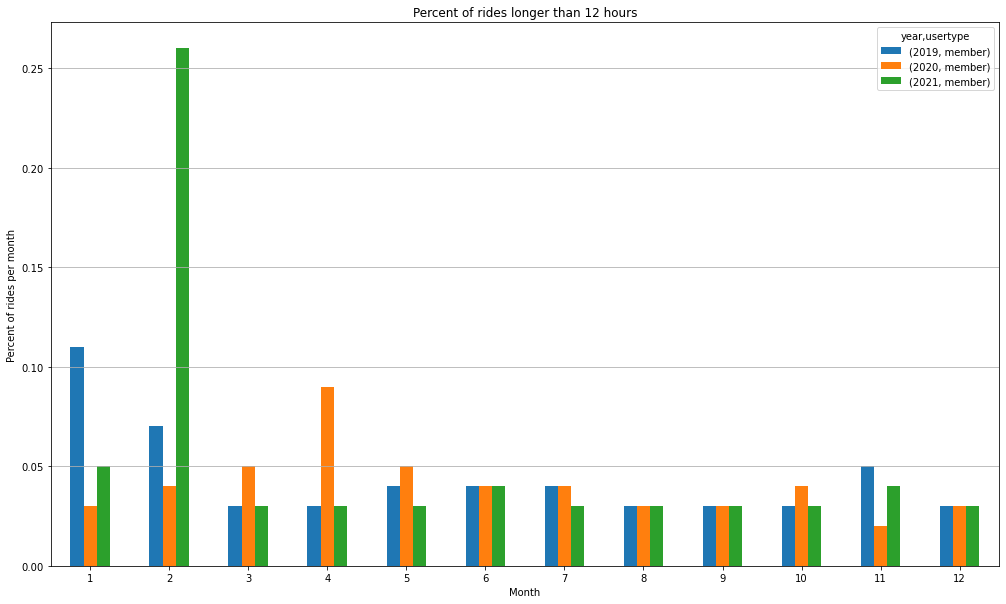

In [231]:
( (tempLong / tempAll).round(4)*100).plot(kind = 'bar',figsize=(17,10))
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Month')
title = 'Percent of rides longer than ' + str(cutoff) + ' hours'
plt.title(title)
plt.ylabel('Percent of rides per month')
plt.grid(axis='y')

In [233]:
longRides.head()

,start_time,end_time,usertype,start_lat,start_lng,end_lat,end_lng,tripduration,month,year
100,2019-01-01 02:21:04,2019-01-02 09:35:30,casual,41.909396,-87.677692,41.925602,-87.653708,1 days 07:14:26,1,2019
145,2019-01-01 04:07:10,2019-01-02 06:37:40,casual,41.917108,-87.710221,41.917108,-87.710221,1 days 02:30:30,1,2019
311,2019-01-01 10:22:26,2019-01-02 10:08:20,member,41.883984,-87.624684,41.883984,-87.624684,0 days 23:45:54,1,2019
517,2019-01-01 12:44:46,2019-01-02 09:57:16,casual,41.882091,-87.639833,41.881320,-87.629521,0 days 21:12:30,1,2019
520,2019-01-01 12:45:14,2019-01-02 07:15:36,casual,41.882091,-87.639833,41.889375,-87.627077,0 days 18:30:22,1,2019


Sometimes bikes don't get put into the racks and so although they are not being ridden, they continue to be checked out, according to Divvy. (I had this happen to me personally!) Unfortunately, I don't think there is a way to detect this from the data.

Similarly, it might be the case that sometimes when a bike is checked out and returned to the same dock, it might be the case that the bike has been removed for servicing. Let's see how many bikes have the same start/end GPS data.

In [232]:
testLatLong = longRides.loc[ (longRides['start_lat'] == longRides['end_lat']) &
                            (longRides['start_lng'] == longRides['end_lng']) ]
testLatLong

,start_time,end_time,usertype,start_lat,start_lng,end_lat,end_lng,tripduration,month,year
145,2019-01-01 04:07:10,2019-01-02 06:37:40,casual,41.917108,-87.710221,41.917108,-87.710221,1 days 02:30:30,1,2019
311,2019-01-01 10:22:26,2019-01-02 10:08:20,member,41.883984,-87.624684,41.883984,-87.624684,0 days 23:45:54,1,2019
4696,2019-01-02 17:58:52,2019-01-03 08:47:38,member,41.925602,-87.653708,41.925602,-87.653708,0 days 14:48:46,1,2019
10132,2019-01-03 18:10:51,2019-01-04 14:00:31,member,41.925602,-87.653708,41.925602,-87.653708,0 days 19:49:40,1,2019
12284,2019-01-04 08:22:47,2019-01-05 06:51:53,member,41.937582,-87.644098,41.937582,-87.644098,0 days 22:29:06,1,2019
...,...,...,...,...,...,...,...,...,...,...
129371,2021-12-31 08:14:50,2022-01-01 02:20:45,casual,41.954468,-87.749594,41.954468,-87.749594,0 days 18:05:55,12,2021
171732,2021-12-19 16:49:38,2021-12-25 17:05:34,casual,41.876535,-87.620473,41.876535,-87.620473,6 days 00:15:56,12,2021
172492,2021-12-13 16:35:46,2021-12-14 08:01:28,casual,41.876535,-87.620473,41.876535,-87.620473,0 days 15:25:42,12,2021
173863,2021-12-04 16:28:04,2021-12-06 12:30:32,casual,41.750940,-87.613790,41.750940,-87.613790,1 days 20:02:28,12,2021


In [229]:
len(testLatLong) / len(longRides)

0.1313090573864946

So about 13% of the greater than 12 hour rides have the same start/end location.


What are the number and proportion of rides for the different hourly breakpoints (2-3, 3-4, etc)?
Let's see if we can figure this out...

In [281]:
def pctLongRides(cutoff,mTemp,cTemp):
    mLong = mTemp[(mTemp['tripduration'] > pd.Timedelta(cutoff  ,unit='h') ) &
                    (mTemp['tripduration'] < pd.Timedelta(cutoff+1,unit='h') ) ]
    mStartFin = mLong.loc[ (mLong['start_lat'] == mLong['end_lat']) & (mLong['start_lng'] == mLong['end_lng']) ]

    cLong = cTemp[(cTemp['tripduration'] > pd.Timedelta(cutoff  ,unit='h') ) &
                    (cTemp['tripduration'] < pd.Timedelta(cutoff+1,unit='h') ) ]
    cStartFin = cLong.loc[ (cLong['start_lat'] == cLong['end_lat']) & (cLong['start_lng'] == cLong['end_lng']) ]

    return len(mLong), round(len(mStartFin)/len(mLong),3), len(cLong), round(len(cStartFin)/len(cLong),3)

mTemp = bigData[bigData['usertype']=='member']
cTemp = bigData[bigData['usertype']=='casual']

hours = []
NmLong, pctMLong, NcLong, pctCLong  = [],[],[],[]
for i in range(2,24):
    a,b,c,d = pctLongRides(i,mTemp,cTemp)
    hours.append(i)
    NmLong.append(a)
    pctMLong.append(b*100)
    NcLong.append(c)
    pctCLong.append(d*100)


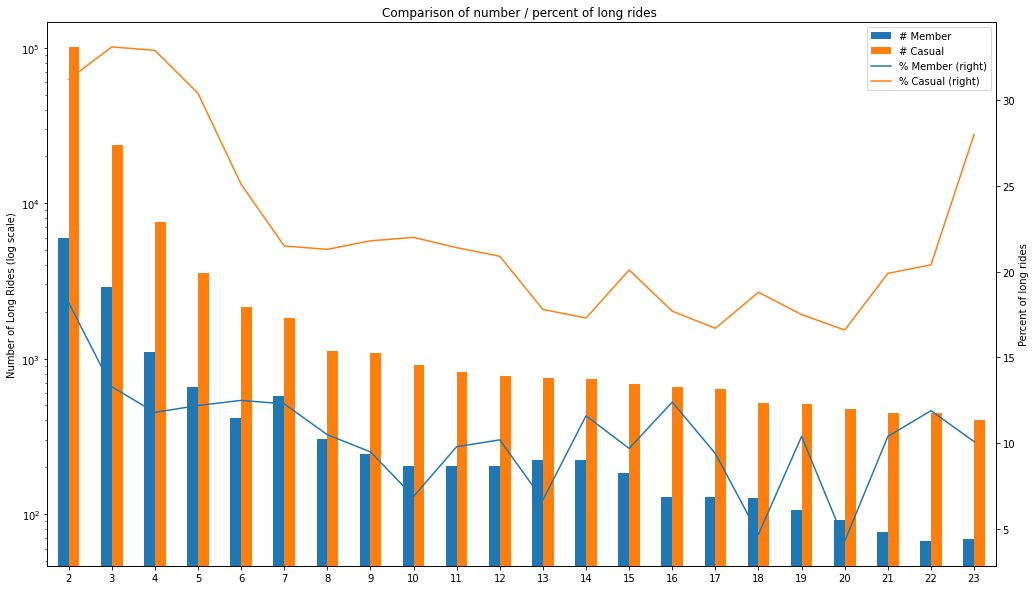

In [282]:

compare = pd.DataFrame({
    '# Member'  : NmLong,
    '% Member': pctMLong,
    '# Casual'  : NcLong,
    '% Casual': pctCLong
})

#ax = plt.gca()
ax = compare[['# Member','# Casual']].plot(kind = 'bar',figsize=(17,10))
plt.ylabel('Number of Long Rides (log scale)')
plt.yscale('log')
compare[['% Member','% Casual']].plot(kind = 'line',secondary_y = True,ax=ax)
plt.ylabel('Percent of long rides')

ax.set_xticklabels(hours)
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Ride length (hours)')
title = 'Comparison of number / percent of long rides '
plt.title(title)

#ax.grid(axis='y')
plt.show()

How do the stations that are busiest change over the three years?
I need to reload the DFs and keep the station ID to calculate this, so let's go to a new notebook.